<a href="https://colab.research.google.com/github/roshanroy11/SuperMarket_Sales--Data-Analysis/blob/main/Supermarket_Sales_Data_Analysis(_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libarbies for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV File - Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_file = '/content/drive/MyDrive/SuperMarket_Sale - Data_Analysis/supermarket_sales.csv'
df = pd.read_csv(csv_file)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Membership_Status,Gender,Age Group,Age,Product line,Unit price,...,Tax 5%,Discount Rate,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,NaN,Female,26-35,28,Health and beauty,74.69,...,26.1415,NaN,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,NaN,Female,26-35,35,Electronic accessories,15.28,...,3.8200,NaN,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,NaN,Female,26-35,35,Home and liFemaleestyle,46.33,...,16.2155,NaN,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,NaN,Male,0-17,16,Health and beauty,58.22,...,23.2880,NaN,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,NaN,Male,26-35,28,Sports and travel,86.31,...,30.2085,NaN,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



# Data Cleaning - Process

In [6]:
# shows null and nonnull column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Membership_Status        0 non-null      float64
 5   Gender                   1000 non-null   object 
 6   Age Group                1000 non-null   object 
 7   Age                      1000 non-null   int64  
 8   Product line             1000 non-null   object 
 9   Unit price               1000 non-null   float64
 10  Quantity                 1000 non-null   int64  
 11  Tax 5%                   1000 non-null   float64
 12  Discount Rate            0 non-null      float64
 13  Total                    999 non-null    float64
 14  Date                     

In [8]:
# Dropping the null Columns
df.drop(['Membership_Status', 'Discount Rate'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Age Group                1000 non-null   object 
 6   Age                      1000 non-null   int64  
 7   Product line             1000 non-null   object 
 8   Unit price               1000 non-null   float64
 9   Quantity                 1000 non-null   int64  
 10  Tax 5%                   1000 non-null   float64
 11  Total                    999 non-null    float64
 12  Date                     1000 non-null   object 
 13  Time                     1000 non-null   object 
 14  Payment                  

In [10]:
# Identify null values in each Column
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Age Group                  0
Age                        0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      1
Date                       0
Time                       0
Payment                    2
cogs                       0
gross margin percentage    0
gross income               1
Rating                     0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Age Group                  0
Age                        0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Age Group',
       'Age', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [14]:
df[['gross income', 'Rating', 'Total']].describe()

,gross income,Rating,Total
count,998.000000,998.000000,998.000000
mean,15.359395,6.974248,322.547301
std,11.705287,1.718969,245.811029
min,0.508500,4.000000,10.678500
25%,5.864625,5.500000,123.157125
50%,12.076000,7.000000,253.596000
75%,22.429500,8.500000,471.019500
max,49.650000,10.000000,1042.650000



# Exploratory Data Analysis

**Gender VS Total**

In [15]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Age Group',
       'Age', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

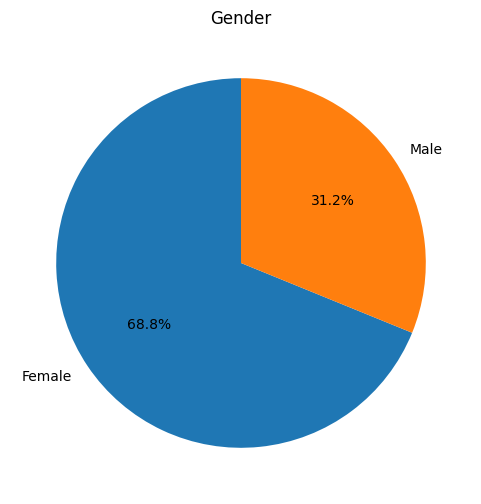

In [16]:
# Count Plot of Geneder using Pie Chart

g = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(g, labels= g.index, autopct='%1.1f%%', startangle= 90 )
plt.title('Gender')

plt.show()

<Axes: xlabel='Gender', ylabel='Total'>

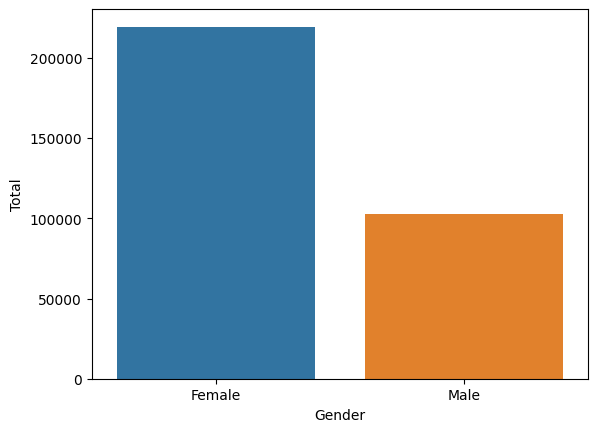

In [ ]:
sales_gender = df.groupby(['Gender'], as_index=False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x = 'Gender', y = 'Total', data = sales_gender)

From the above graphs based on Gender vs Total : We can see the number of purchase from female is greater and men are lesser

**Age Group Vs Total**


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Age Group',
       'Age', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

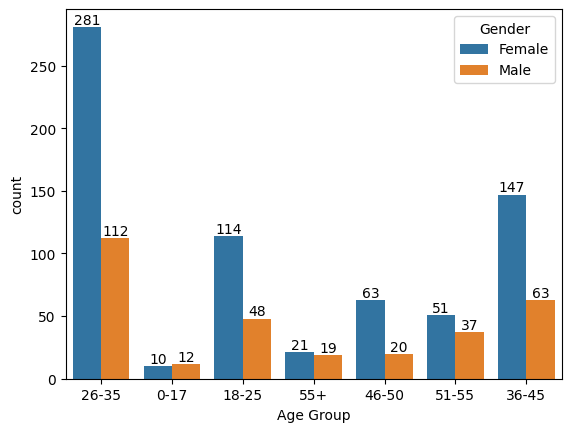

In [ ]:
a = sns.countplot(data = df, x= 'Age Group', hue = 'Gender')
for bars in a.containers:
  a.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Total'>

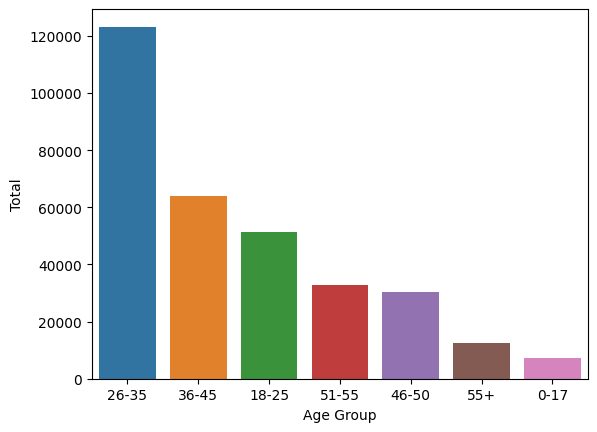

In [ ]:
sales_age = df.groupby(['Age Group'], as_index= False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(x= 'Age Group', y= 'Total', data = sales_age)

From the above graphs based on Age Group vs Total : The Total purchase is done between Age 26 -35 yrs female

**City Vs Quantity**

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Age Group',
       'Age', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

<Axes: xlabel='City', ylabel='Quantity'>

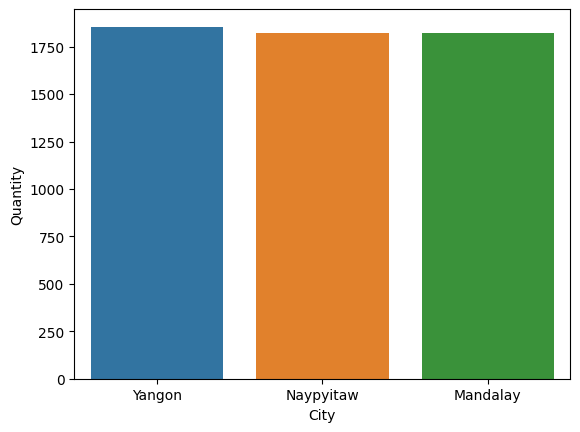

In [ ]:
sales_city = df.groupby(['City'], as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
sns.barplot(data = sales_city, x = 'City', y='Quantity')

<Axes: xlabel='City', ylabel='Total'>

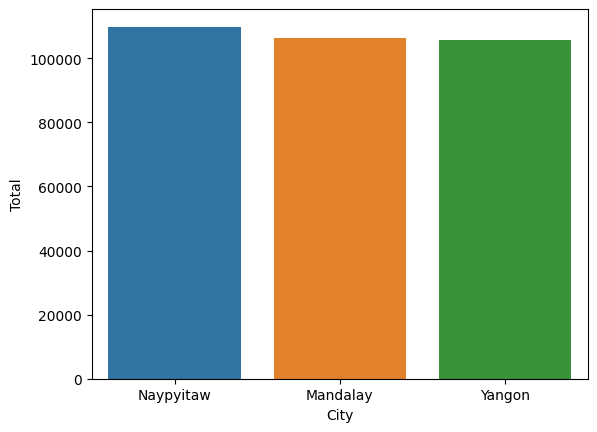

In [ ]:
sales_city = df.groupby(['City'], as_index= False)['Total'].sum().sort_values(by='Total', ascending=False)
sns.barplot(data = sales_city, x = 'City', y='Total')

From the above graphs based on City vs Quantity : We can see the highest quantity of item pruchsed from the Yangon City but has spent less purchase total for the purchase. Wherease Naypyitwa City has pruchase less quantity of items but has the highest purchase total.